### generated custom plots for the 

- uses the modular code developed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Manually set the current working directory (cwd)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.solvers import Euler1D_Solve

In [2]:
import configparser

config = configparser.ConfigParser()
config_path = os.path.join(os.getcwd(),"..", "src", "config.ini")
config.read(config_path)  # Use the path you built

n = config.getint("mesh_1D", "n")
domain_start = config.getfloat("mesh_1D", "domain_start")
domain_end = config.getfloat("mesh_1D", "domain_end")
y_0 = config.getfloat("initial_conditions", "y_0")

# Derivative function
expr = config.get("ode_function", "expression")


# Define f(t, y) dynamically using eval
def f(t, y):
    return eval(expr, {"np": np, "t": t, "y": y})


# Create an instance of the solver
solver = Euler1D_Solve(f, domain_start, domain_end, y_0, n)
solver1 = Euler1D_Solve(f, domain_start, domain_end, y_0, 25)
solver2 = Euler1D_Solve(f, domain_start, domain_end, y_0, 1000)

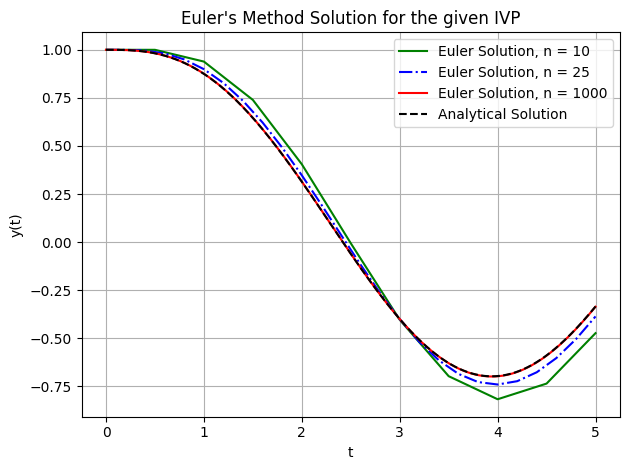

In [3]:
# Analytical solution for comparison
def analytical_solution(t: np.ndarray) -> np.ndarray:
    """Analytical solution of the ODE."""
    return np.exp(-t)/2 + (np.sin(t) + np.cos(t))/2

y_analytical = analytical_solution(np.linspace(domain_start, domain_end, 10000))
plt.plot(solver.mesh, solver.solution, label='Euler Solution, n = 10',color="green")
plt.plot(solver1.mesh, solver1.solution, label='Euler Solution, n = 25',color="blue",linestyle='-.')
plt.plot(solver2.mesh, solver2.solution, label='Euler Solution, n = 1000',color="red")
plt.plot(np.linspace(domain_start, domain_end, 10000), y_analytical, label='Analytical Solution', color="black", linestyle='--')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Euler's Method Solution for the given IVP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Error plot

In [4]:
y_analytical_10 = analytical_solution(np.linspace(domain_start, domain_end, 11))
y_analytical_1000 = analytical_solution(np.linspace(domain_start, domain_end, 1001))
y_analytical_25 = analytical_solution(np.linspace(domain_start, domain_end, 26))

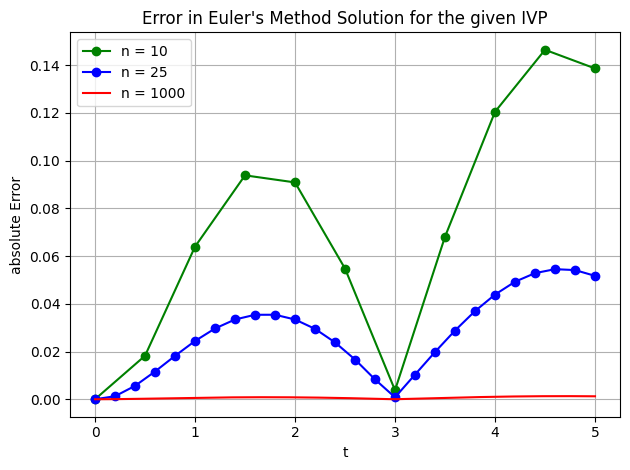

In [5]:
error_25 = abs(solver1.solution - y_analytical_25)
error_10 = abs(solver.solution - y_analytical_10)
error_1000 = abs(solver2.solution - y_analytical_1000)
plt.plot(solver.mesh, error_10, label='n = 10', color="green", marker='o', linestyle='-')
plt.plot(solver1.mesh, error_25, label='n = 25', color="blue", marker='o', linestyle='-')
plt.plot(solver2.mesh, error_1000, label='n = 1000', color="red", linestyle='-')
plt.xlabel("t")
plt.ylabel("absolute Error")

plt.title("Error in Euler's Method Solution for the given IVP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()